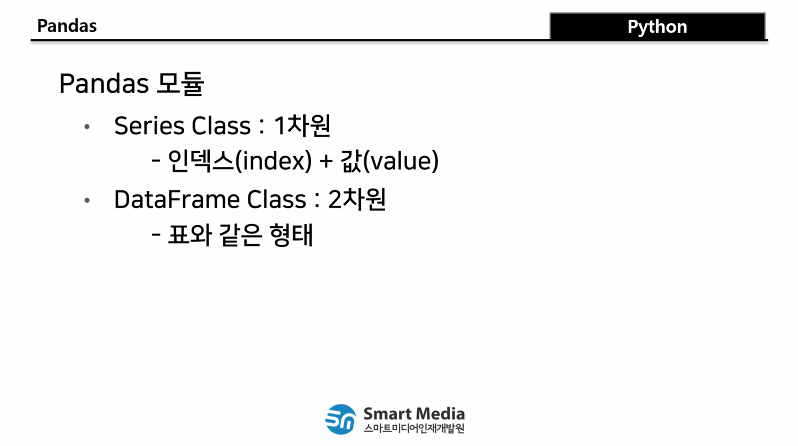
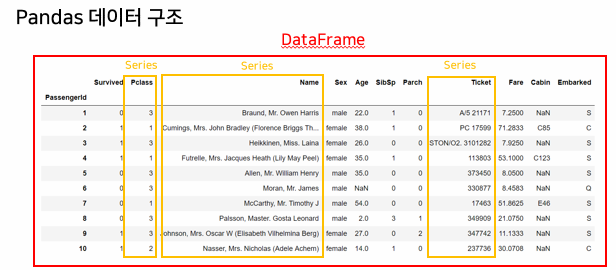
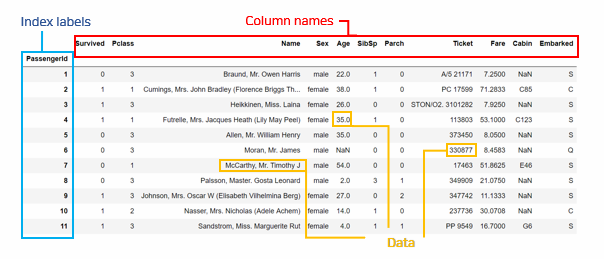

In [1]:
# pandas 사용하기
import pandas as pd

## 시리즈 사용 

In [2]:
# Series 클래스 생성
population = pd.Series([9904312, 3448737, 2890451, 2466052])

In [3]:
population

0    9904312
1    3448737
2    2890451
3    2466052
dtype: int64

In [6]:
# 인덱스를 지정하여 생성하기
population = pd.Series([9904312, 3448737, 2890451, 2466052], index=['서울','부산','인천','대구'])

In [4]:
# 값 확인하기
population.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [12]:
# 인덱스 확인하기
population.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [13]:
# 타입확인
population.dtype

dtype('int64')

In [15]:
# 이름 정하기
population.name = "인구"
population.index.name = "도시"

In [16]:
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [18]:
# Series연산
population/1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

In [20]:
# Series 인덱싱
population['부산'], population[1]


(3448737, 3448737)

In [22]:
population[[1,0,3]] #시리즈 형태 유지하면서 데이터 가져오기 / 인덱스 원하는 순서대로

도시
부산    3448737
서울    9904312
대구    2466052
Name: 인구, dtype: int64

In [25]:
population[[1,2,3]]

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [27]:
# boolean 색인
population[[True,False,True,False]]

도시
서울    9904312
인천    2890451
Name: 인구, dtype: int64

In [28]:
population>2500000

도시
서울     True
부산     True
인천     True
대구    False
Name: 인구, dtype: bool

In [29]:
population[population>2500000]
#이건 True,True,True,False 가 들어간거랑 동일하다고 생각하기??

도시
서울    9904312
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [30]:
# 500만 이하의 도시
population[population<=5000000]
# b=population<=5000000
# population[b] 이것도 가능!!

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [34]:
# Series 슬라이싱
population[1:3]
population['부산':'대구'] #문자(명칭)을 가지고 슬라이싱할때는 입력한데까지...(마지막인덱스까지)

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [32]:
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [36]:
# Series 클래스 생성 -> 딕셔너리 이용
data = {'서울':9631482,'부산':3393191,'인천':2632035,'대전':1490158}
population2 = pd.Series(data)

In [38]:
population2.name = '인구'
population2.index.name='도시'

In [39]:
population2

도시
서울    9631482
부산    3393191
인천    2632035
대전    1490158
Name: 인구, dtype: int64

In [43]:
# 2015년도와 2010년도의 인구 증가를 계산
ds=population-population2
ds

도시
대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
Name: 인구, dtype: float64

In [44]:
ds.notnull()

도시
대구    False
대전    False
부산     True
서울     True
인천     True
Name: 인구, dtype: bool

In [46]:
# Serise 에서 Non이 아닌 값 확인
ds[ds.notnull()] #데이터가 true 인것만...

도시
부산     55546.0
서울    272830.0
인천    258416.0
Name: 인구, dtype: float64

In [48]:
# Serise 에 NaN인 값 확인
ds[ds.isnull()]

도시
대구   NaN
대전   NaN
Name: 인구, dtype: float64

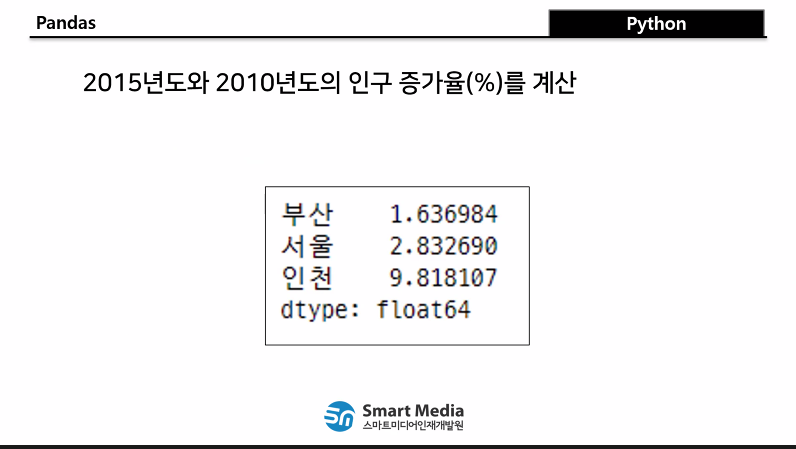

In [54]:
# 2015년도(population)와 2010년도(population2)의 인구 증가율(%)를 계산
rs=(population-population2)/population2*100
rs[rs.notnull()]

도시
부산    1.636984
서울    2.832690
인천    9.818107
Name: 인구, dtype: float64

In [57]:
# 데이터 갱신
rs['부산']= 1.6
# 데이터 추가
rs['광주']= 1.41
# 데이터 삭제
del rs['대구']
rs

도시
대전         NaN
부산    1.600000
서울    2.832690
인천    9.818107
광주    1.410000
Name: 인구, dtype: float64

## Data Frame 사용 

In [64]:
data = { "2015": [9904312, 3448737, 2890451, 2466052],"2010": [9631482, 3393191, 2632035, 2431774]}
df = pd.DataFrame(data, index=["서울","부산","인천","대구"])
# df.index = ["서울","부산","인천","대구"]
df

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [66]:
data= [ [9904312, 3448737, 2890451, 2466052], [9631482, 3393191, 2632035, 2431774] ]
df2 = pd.DataFrame(data)
df2.index = ['2015','2010']
df2.columns=['서울','부산','인천','대구']
df2

,서울,부산,인천,대구
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774


In [67]:
# 행/열 변경
df2.T

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [70]:
df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [69]:
df2=df2.T

In [73]:
# 값 확인 - numpy 형태로 확인할 수 있다!?
df.values

# 인덱스 확인
df.index

# 컬럼 확인
df.columns

Index(['2015', '2010'], dtype='object')

In [75]:
# 열 인덱싱 -> Series 클래스로...?
df['2015']

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 2015, dtype: int64

In [77]:
df[['2015']]

,2015
서울,9904312
부산,3448737
인천,2890451
대구,2466052


In [101]:
df[['2015','2010','2010','2015']]

,2015,2010,2010,2015
서울,9904312,9631482,9631482,9904312
부산,3448737,3393191,3393191,3448737
인천,2890451,2632035,2632035,2890451
대구,2466052,2431774,2431774,2466052


In [79]:
df[0] # -> 숫자형태로 인덱싱은 예러 나온다.. 안된다!!

KeyError: 0

In [99]:
# 행 인덱싱 -> 슬라이싱으로 가져와야 한다.
df['서울':'인천']


,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035


In [100]:
df[0:3]

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035


In [84]:
df[0:1] # df[0] 이런거 안된다!

,2015,2010
서울,9904312,9631482


In [85]:
# 행 인덱싱 -> 슬라이싱으로 가져와야 한다.
df['서울':'인천'] # 행 먼저
df[0:3] # 열 인덱싱??

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035


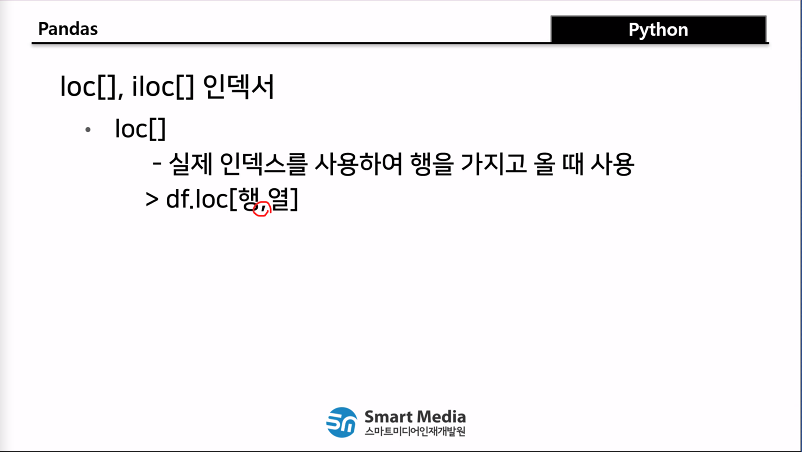

In [5]:
# loc[],iloc[]인덱서
df.loc["서울":"부산","2015":]
df.loc[:"서울","2015":]

NameError: name 'df' is not defined

In [94]:
df.iloc[:3,:1]

,2015
서울,9904312
부산,3448737
인천,2890451


In [98]:
# boolean 색인 -> 행을?
b=df['2010']>=2500000
df[b]
df.loc[b,:"2015"]



,2015
서울,9904312
부산,3448737
인천,2890451


In [5]:
#csv 파일 불러오기
population_number= pd.read_csv('population_number.csv', encoding='euc-kr', index_col='도시')

In [6]:
population_number

,지역,2015,2010,2005,2000
도시,,,,,
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437
인천,수도권,2890451,2632035.0,NaN,2466338
대구,경상권,2466052,2431774.0,2456016.0,2473990


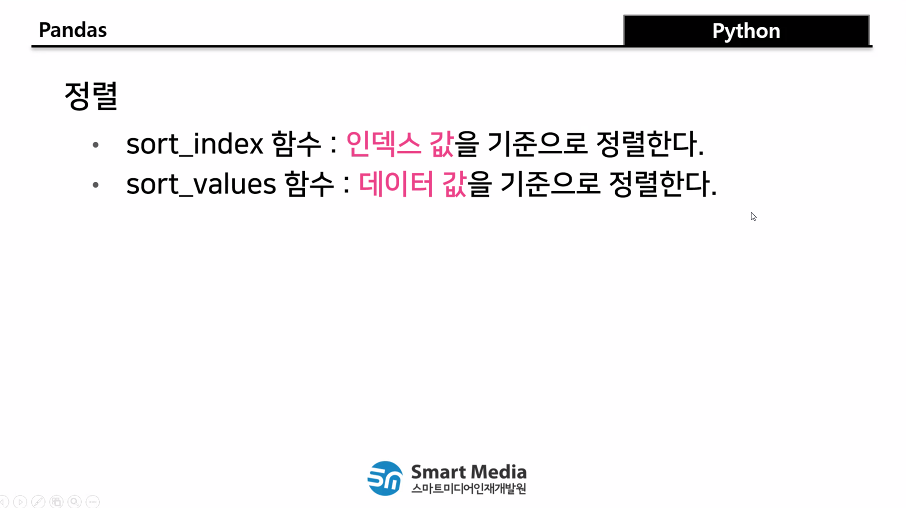

In [8]:
# 정렬 -> 오름차순
population_number['2010'].sort_values()

# 내림차순
population_number['2010'].sort_values(ascending=False) #기본값은 true로 됨..


도시
서울    9631482.0
인천    2632035.0
대구    2431774.0
부산          NaN
Name: 2010, dtype: float64

In [9]:
population_number.sort_values(by='2010')

,지역,2015,2010,2005,2000
도시,,,,,
대구,경상권,2466052,2431774.0,2456016.0,2473990
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437


In [10]:
population_number.sort_values(by=['지역','2010'])

,지역,2015,2010,2005,2000
도시,,,,,
대구,경상권,2466052,2431774.0,2456016.0,2473990
부산,경상권,3448737,NaN,NaN,3655437
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972


In [11]:
#데이터 개수 세기
population_number.count()

지역      4
2015    4
2010    3
2005    2
2000    4
dtype: int64

In [12]:
# 결측치 확인하는 방법
population_number.isnull().sum()

지역      0
2015    0
2010    1
2005    2
2000    0
dtype: int64

In [16]:
# 각각의 값이 들어있는 횟수 세기
s = pd.Series([1,1,3,4,2,3,3,3,6,7,8,8,9,9,9,9,9,7])
s.value_counts()

9    5
3    4
1    2
7    2
8    2
2    1
4    1
6    1
dtype: int64

In [2]:
score = pd.read_csv('score.csv',index_col='과목',encoding='euc-kr')
# 인코딩 encoding='euc-kr' ,index_col='과목'   index_row?

In [3]:
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [4]:
# 합계구하기 -> 컬럼기준 (반별 합계)
score.sum() # axis=0

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [7]:
# 합계 구하기 -> 인덱스(행)기준 (과목별 합계)
score.sum(axis=1) # 기본값은 컬럼기준으로!!

과목
수학    201
영어    282
국어    253
사회    298
과학    163
dtype: int64

In [ ]:
score.loc[:,:'4반'].sum(axis=1)

In [ ]:
pd.DataFrame[]

In [8]:
score['합계']=score.sum(axis=1)
#계속 누르면 더해지고 더해지고 하면서 누적!!

In [ ]:
score['합계']=score.loc[:,:'4반'].sum(axis=1)


In [9]:
score

,1반,2반,3반,4반,합계
과목,,,,,
수학,45,44,73,39,201
영어,76,92,45,69,282
국어,47,92,45,69,253
사회,92,81,85,40,298
과학,11,79,47,26,163


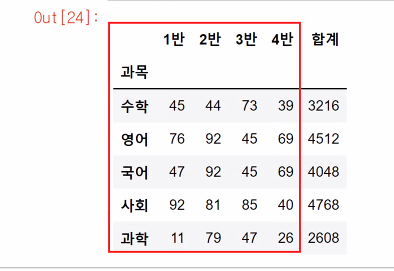

In [20]:
score.loc[:,'1반':'4반'].sum(axis=1)
score.loc[:,:'4반'].sum(axis=1)

과목
수학    201
영어    282
국어    253
사회    298
과학    163
dtype: int64

In [21]:
score.loc[:,:'4반']

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [23]:
score.mean(axis=1)

과목
수학     80.4
영어    112.8
국어    101.2
사회    119.2
과학     65.2
dtype: float64

In [25]:
score.loc[:,:'4반'].mean(axis=1)

과목
수학    50.25
영어    70.50
국어    63.25
사회    74.50
과학    40.75
dtype: float64

In [26]:
score['평균']=score.loc[:,:'4반'].mean(axis=1)


In [39]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45,44,73,39,201,50.25
영어,76,92,45,69,282,70.50
국어,47,92,45,69,253,63.25
사회,92,81,85,40,298,74.50
과학,11,79,47,26,163,40.75


In [37]:
#컬럼 삭제
score.drop('평균1',axis=1,  inplace=True)

In [43]:
score.loc[:,:'4반'].mean(axis=0)

1반    54.2
2반    77.6
3반    59.0
4반    48.6
dtype: float64

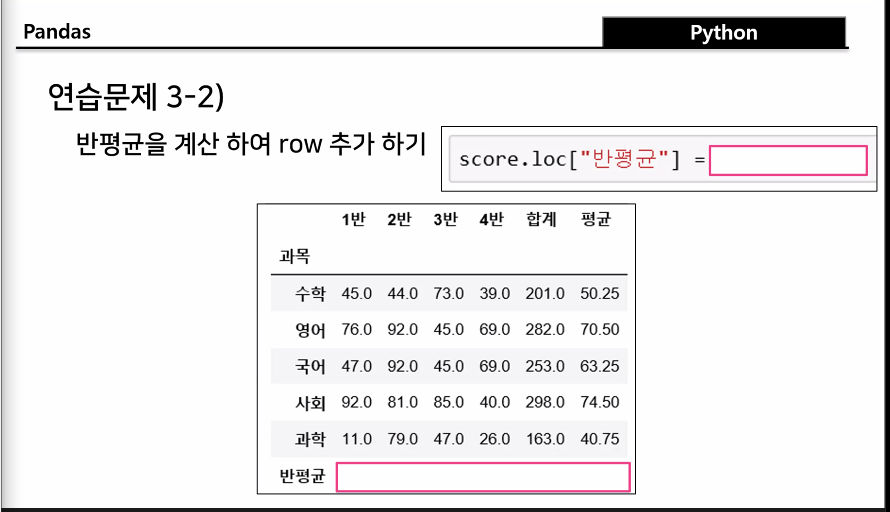

In [45]:
score.loc["반평균"]=score.loc[:,:'4반'].mean(axis=0)
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,NaN,NaN


In [51]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,NaN,NaN


In [54]:
# 결측치 채우기 
score.fillna(value=0,inplace=True)
# inplace=True 바꾼거 반영하기

In [55]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,0.0,0.00


In [ ]:
# 타이타닉 나이 결측치를 남자별 평균, 여자별 평균으로 채우기!!!

In [63]:
# 큰 값/ 작은 값 찾기
score.max()
score.max(axis=1)
score.min()
score.min(axis=1)
print(score.max())
print(score.max(axis=1))
print(score.min())
print(score.min(axis=1))


1반     92.0
2반     92.0
3반     85.0
4반     69.0
합계    298.0
평균     74.5
dtype: float64
과목
수학     201.0
영어     282.0
국어     253.0
사회     298.0
과학     163.0
반평균     77.6
dtype: float64
1반    11.0
2반    44.0
3반    45.0
4반    26.0
합계     0.0
평균     0.0
dtype: float64
과목
수학     39.0
영어     45.0
국어     45.0
사회     40.0
과학     11.0
반평균     0.0
dtype: float64


In [60]:
score.loc[:,:"4반"].max(axis=1)

과목
수학     73.0
영어     92.0
국어     92.0
사회     92.0
과학     79.0
반평균    77.6
dtype: float64

In [64]:
# 열 / 행 삭제
# 반영은 inplace = True
score.drop('영어')


,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,0.0,0.00


In [67]:
score.drop('평균', axis=1) #열 삭제

,1반,2반,3반,4반,합계
과목,,,,,
수학,45.0,44.0,73.0,39.0,201.0
영어,76.0,92.0,45.0,69.0,282.0
국어,47.0,92.0,45.0,69.0,253.0
사회,92.0,81.0,85.0,40.0,298.0
과학,11.0,79.0,47.0,26.0,163.0
반평균,54.2,77.6,59.0,48.6,0.0


In [68]:
# Series 클래스 또는 데이터 프레임들을 병합 할 수 있는 함수
# concat

s1=pd.Series([275,260,250], index=['유재석','신동엽','강호동'])
s1.name = '발사이즈'
s1

유재석    275
신동엽    260
강호동    250
Name: 발사이즈, dtype: int64

In [74]:
s2=pd.Series([250,245], index=['송은이','김숙'])
s2.name = '발사이즈'
s2

송은이    250
김숙     245
Name: 발사이즈, dtype: int64

In [75]:
s3=pd.concat([s1,s2])
s3

# 2개의 시리즈가 이름이 같으면 합쳐도 이름 같고 다르면 합치면 이름 안나와~~

유재석    275
신동엽    260
강호동    250
송은이    250
김숙     245
Name: 발사이즈, dtype: int64

In [77]:
s4=pd.Series([0.2,1.8,1.5], index=['유재석','신동엽','강호동'])
s4.name='시력'
s4

유재석    0.2
신동엽    1.8
강호동    1.5
Name: 시력, dtype: float64

In [78]:
s1

유재석    275
신동엽    260
강호동    250
Name: 발사이즈, dtype: int64

In [80]:
s5=pd.concat([s1,s4])
s5

유재석    275.0
신동엽    260.0
강호동    250.0
유재석      0.2
신동엽      1.8
강호동      1.5
dtype: float64

In [84]:
s5=pd.concat([s1,s4], axis=1)
s5
# 시리즈 클래스의 이름이 컬럼이 된다

,발사이즈,시력
유재석,275,0.2
신동엽,260,1.8
강호동,250,1.5


In [83]:
s5=pd.concat([s1,s4], axis=1)
s5.columns=['발사이즈1','시력1']
s5

,발사이즈1,시력1
유재석,275,0.2
신동엽,260,1.8
강호동,250,1.5


In [86]:
pd.concat([s5,s5],axis=1) # 아래로 하고싶으면 공백이나  axis=1

,발사이즈,시력,발사이즈,시력
유재석,275,0.2,275,0.2
신동엽,260,1.8,260,1.8
강호동,250,1.5,250,1.5


In [90]:
pd.concat([s3,s4], axis=1) # 아래로 하고싶으면 공백이나  axis=1

,발사이즈,시력
유재석,275,0.2
신동엽,260,1.8
강호동,250,1.5
송은이,250,NaN
김숙,245,NaN


유재석    0.2
신동엽    1.8
강호동    1.5
Name: 시력, dtype: float64